In [2]:
#Import data and play. python numpy1 kernal. 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import scipy
from scipy import stats

print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("SciPy:", scipy.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", sns.__version__)



NumPy: 1.26.4
Pandas: 2.3.3
SciPy: 1.16.3
Matplotlib: 3.10.8
Seaborn: 0.13.2


In [12]:
#add manual label of vesicle vs bud
df1 = pd.read_excel('vesicle_bud_axes.xlsx') #input data, filename, axes, circularity and coat identity

In [13]:
display(df1)

,filename,long_axis,short_axis,circularity,COP
0,High_mag_L12_P1_2_memb_15_1-COP1.mrc,89.675670,78.587663,0.876354,1
1,High_mag_L12_P1_2_memb_15_2-COP1.mrc,58.088295,52.751141,0.908120,1
2,High_mag_L12_P1_2_memb_16_1-COP2.mrc,75.898053,73.085432,0.962942,2
3,High_mag_L12_P1_2_memb_16_2-COP2.mrc,67.933767,65.620399,0.965947,2
4,High_mag_L12_P1_2_memb_19_1-COP1.mrc,72.873173,72.003956,0.988072,1
...,...,...,...,...,...
137,L55_Position_2_3_memb_76_1-COP2.mrc,72.939422,69.003726,0.946042,2
138,L7_LOW_1_3_HIGH_1_memb_16_4-COP1.mrc,68.788826,64.338627,0.935306,1
139,L7_LOW_1_3_HIGH_1_memb_35_2-COP2.mrc,89.145558,79.199730,0.888432,2
140,Position_2_2_memb_103_1-COP2.mrc,100.225226,92.997924,0.927889,2


In [14]:
#add manual label of vesicle vs bud

excel_df = pd.read_excel('vesiclesvsbuds.xlsx') #input data filename, whether bud or vesicle, whether ellipsoid or sphere

display(excel_df)

/nemo/lab/zanettig/home/users/downesk/.conda/envs/numpy1/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,Image_Name,Bud/Vesicle,Ellipsoid/Sphere
0,NaN,High_mag_L12_P1_2_memb_10_1-COP2.mrc,Bud,Ellipsoid
1,NaN,High_mag_L12_P1_2_memb_1_1-COP2.mrc,Bud,Ellipsoid
2,NaN,High_mag_L12_P1_2_memb_1_2-COP2.mrc,Bud,Sphere
3,NaN,High_mag_L12_P1_2_memb_1_3-COP2.mrc,Bud,Sphere
4,NaN,High_mag_L12_P1_2_memb_1_4-COP2.mrc,Bud,Ellipsoid
...,...,...,...,...
345,NaN,Position_6_2_memb_21_1-COP1.mrc,Bud,Ellipsoid
346,NaN,Position_6_2_memb_22_1-COP1.mrc,Bud,Ellipsoid
347,NaN,Position_6_2_memb_24_1-COP1.mrc,Bud,Sphere
348,NaN,Position_6_2_memb_30_1-COP2.mrc,Bud,Ellipsoid


In [15]:
#combine datasets
excel_df = excel_df.rename(columns={"Image_Name": "filename"})

df = pd.merge(df1, excel_df, on="filename", how="left")

display(df)

,filename,long_axis,short_axis,circularity,COP,Unnamed: 0,Bud/Vesicle,Ellipsoid/Sphere
0,High_mag_L12_P1_2_memb_15_1-COP1.mrc,89.675670,78.587663,0.876354,1,NaN,Vesicle,Ellipsoid
1,High_mag_L12_P1_2_memb_15_2-COP1.mrc,58.088295,52.751141,0.908120,1,NaN,Vesicle,Ellipsoid
2,High_mag_L12_P1_2_memb_16_1-COP2.mrc,75.898053,73.085432,0.962942,2,NaN,Vesicle,Ellipsoid
3,High_mag_L12_P1_2_memb_16_2-COP2.mrc,67.933767,65.620399,0.965947,2,NaN,Vesicle,Ellipsoid
4,High_mag_L12_P1_2_memb_19_1-COP1.mrc,72.873173,72.003956,0.988072,1,NaN,Vesicle,Ellipsoid
...,...,...,...,...,...,...,...,...
137,L55_Position_2_3_memb_76_1-COP2.mrc,72.939422,69.003726,0.946042,2,NaN,Vesicle,Ellipsoid
138,L7_LOW_1_3_HIGH_1_memb_16_4-COP1.mrc,68.788826,64.338627,0.935306,1,NaN,Vesicle,Ellipsoid
139,L7_LOW_1_3_HIGH_1_memb_35_2-COP2.mrc,89.145558,79.199730,0.888432,2,NaN,Vesicle,Ellipsoid
140,Position_2_2_memb_103_1-COP2.mrc,100.225226,92.997924,0.927889,2,NaN,Vesicle,Ellipsoid


In [20]:
#Plotting

In [28]:
palette = {'1': '#E4A8E2', '2': '#a3d433'}

palette_3 = {'Bud': 'black', 'Vesicle': 'white'}

palette_2 = {'Ellipsoid': 'black', 'Sphere': 'white'}


palette3_errors = {'Bud': 'grey', 'Vesicle': 'white'}

#hex codes from chimerax

In [31]:
# Filter the data for vesicles

vesicle_df = df[df["Bud/Vesicle"] == 'Vesicle']
bud_df = df[df["Bud/Vesicle"] == 'Bud']

display(vesicle_df)
display(bud_df)

,filename,long_axis,short_axis,circularity,COP,Unnamed: 0,Bud/Vesicle,Ellipsoid/Sphere
0,High_mag_L12_P1_2_memb_15_1-COP1.mrc,89.675670,78.587663,0.876354,1,NaN,Vesicle,Ellipsoid
1,High_mag_L12_P1_2_memb_15_2-COP1.mrc,58.088295,52.751141,0.908120,1,NaN,Vesicle,Ellipsoid
2,High_mag_L12_P1_2_memb_16_1-COP2.mrc,75.898053,73.085432,0.962942,2,NaN,Vesicle,Ellipsoid
3,High_mag_L12_P1_2_memb_16_2-COP2.mrc,67.933767,65.620399,0.965947,2,NaN,Vesicle,Ellipsoid
4,High_mag_L12_P1_2_memb_19_1-COP1.mrc,72.873173,72.003956,0.988072,1,NaN,Vesicle,Ellipsoid
...,...,...,...,...,...,...,...,...
137,L55_Position_2_3_memb_76_1-COP2.mrc,72.939422,69.003726,0.946042,2,NaN,Vesicle,Ellipsoid
138,L7_LOW_1_3_HIGH_1_memb_16_4-COP1.mrc,68.788826,64.338627,0.935306,1,NaN,Vesicle,Ellipsoid
139,L7_LOW_1_3_HIGH_1_memb_35_2-COP2.mrc,89.145558,79.199730,0.888432,2,NaN,Vesicle,Ellipsoid
140,Position_2_2_memb_103_1-COP2.mrc,100.225226,92.997924,0.927889,2,NaN,Vesicle,Ellipsoid


,filename,long_axis,short_axis,circularity,COP,Unnamed: 0,Bud/Vesicle,Ellipsoid/Sphere


In [20]:
# Filter the data for COP1 and COP2 vesicles
COP1_vesicles = vesicle_df.loc[df["COP"] == 1, ["circularity"]]

COP2_vesicles = vesicle_df.loc[df["COP"] == 2, ["circularity"]]

# Mann-Whitney U test
u_stat, p_value_mw = stats.mannwhitneyu(COP1_vesicles, COP2_vesicles, alternative='two-sided')
print(f"Mann-Whitney U test: U={u_stat}, p={p_value_mw}")

# Kolmogorov-Smirnov test
ks_stat, p_value_ks = stats.ks_2samp(COP1_vesicles, COP2_vesicles)
print(f"Kolmogorov-Smirnov test: KS={ks_stat}, p={p_value_ks}")

Mann-Whitney U test: U=[1569.], p=[0.00967239]
Kolmogorov-Smirnov test: KS=[0.29406308], p=[0.0079307]


/tmp/slurm_41245503/ipykernel_123122/3438676228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=vesicle_df, x='COP', y='circularity', inner="quart", palette=palette, cut=0)


COP
1    0.917853
2    0.945627
Name: circularity, dtype: float64


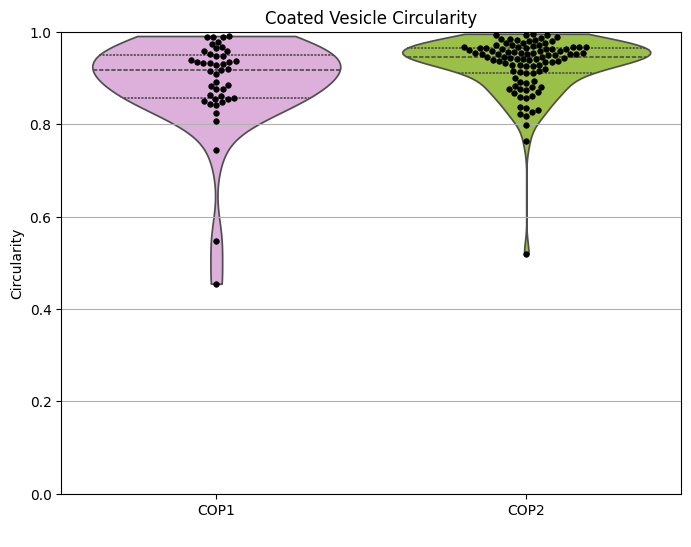

In [33]:
#circularity

plt.figure(figsize=(8,6))
sns.violinplot(data=vesicle_df, x='COP', y='circularity', inner="quart", palette=palette, cut=0)
plt.title('Coated Vesicle Circularity')
plt.xlabel(' ')
plt.ylabel('Circularity')
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.xticks(ticks=[0, 1], labels=["COP1", "COP2"])


sns.swarmplot(data=vesicle_df, x='COP', y='circularity', size=4, color='black', edgecolor='black', linewidth=0.5)
# spread points horizontally to reduce overlap
plt.savefig("Coated Vesicle Circularity_1.pdf", format='pdf', bbox_inches='tight')

medians = df.groupby('COP')['circularity'].median()

print(medians)